# Task 2 - Predictions using Unsupervised ML

In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

%matplotlib inline

## Loading and inspecting the data (iris)

In [2]:
iris = pd.read_csv(os.path.join("Iris.csv"), index_col="Id")
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


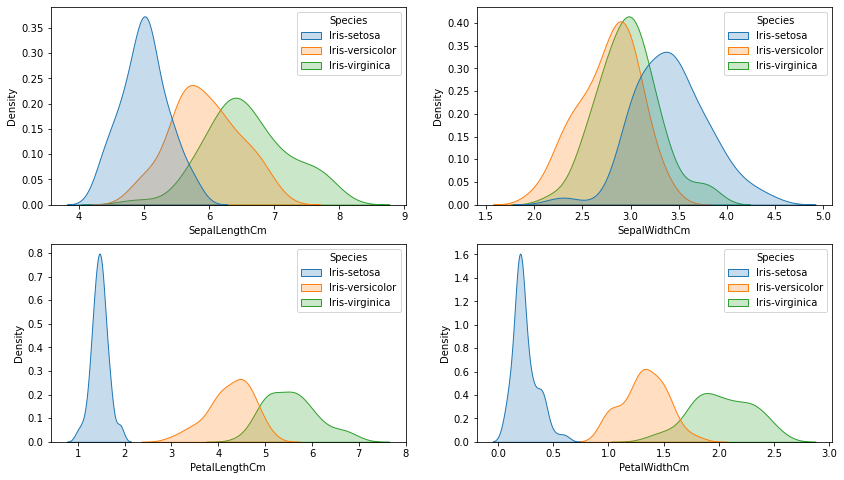

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

sns.kdeplot(x="SepalLengthCm", hue="Species", data=iris, shade=True, ax=axes[0, 0]);
sns.kdeplot(x="SepalWidthCm", hue="Species", data=iris, shade=True, ax=axes[0, 1]);
sns.kdeplot(x="PetalLengthCm", hue="Species", data=iris, shade=True, ax=axes[1, 0]);
sns.kdeplot(x="PetalWidthCm", hue="Species", data=iris, shade=True, ax=axes[1, 1]);

As it shown in the figure above we can easly seperate between species using `PetalLength` and `PetalWidth` but not using the `SepalLength` and `SepalWidth` as the `Species` distribution is overlaping in them.

In [4]:
## Remove the species from the data
X = iris.drop("Species", axis="columns")
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [5]:
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


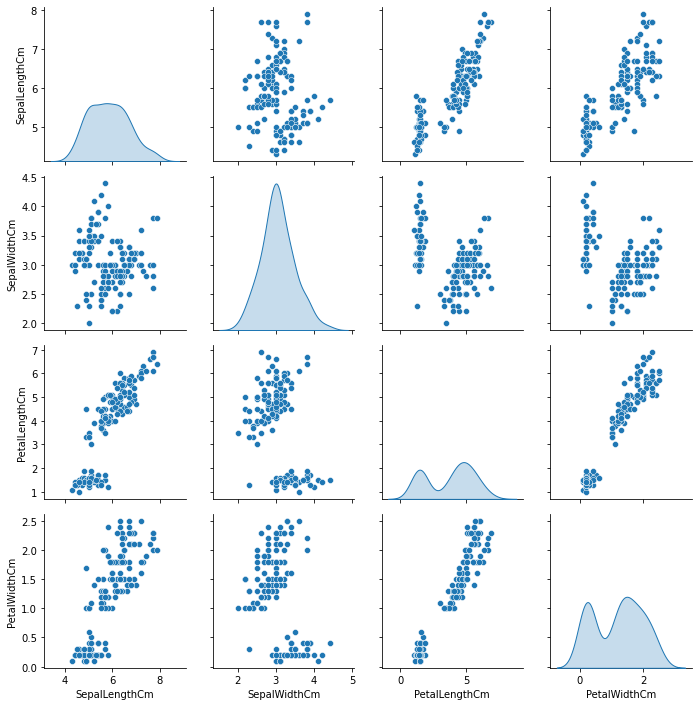

In [6]:
columns = X.columns
g = sns.PairGrid(data=iris, vars=columns)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.kdeplot, shade=True)

These Histograms in the PairGrid above clearly shows us that there is two different groups one is large and the other is small as it consist of two peaks that can clearly identified with the naked eye this is the case for the Petals but not like for the Sepals as it consist only of one peak.

## Data Modeling (KMeans)

In [7]:
X_values = X.values
species = ["Iris-Setosa", "Iris-Versicolour", "Iris-Virginica"]

### Using Random `n_clusters` Parameter

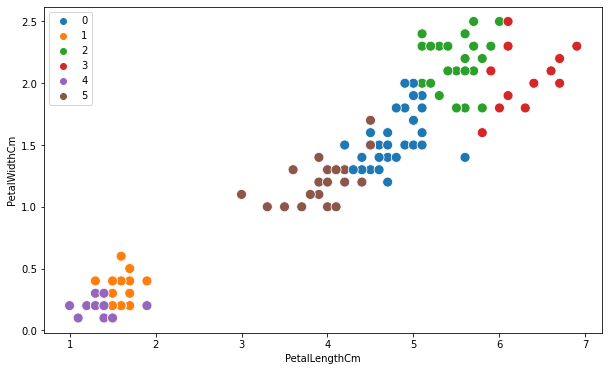

In [8]:
kmeans = KMeans(n_clusters=np.random.randint(2, 8))

kmeans = kmeans.fit(X_values)
centroids = kmeans.cluster_centers_
clusters = kmeans.predict(X_values)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", data=X, hue=clusters,
                palette="tab10", s=100);

### Choosing the best `n_clusters` using elbew method

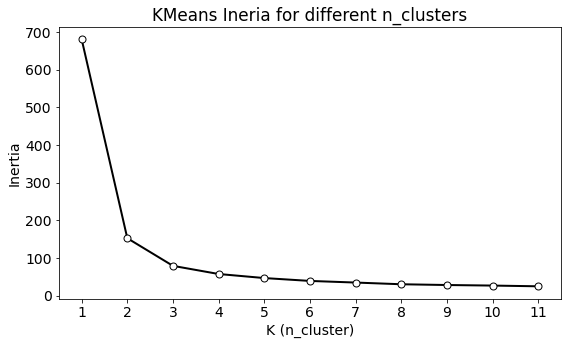

In [9]:
MIN_CLUSTERS, MAX_CLUSTERS = 1, 12
RANDOM_STATE = 42

inertias = []

for k in range(MIN_CLUSTERS, MAX_CLUSTERS):
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans = kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

xticks = range(MIN_CLUSTERS, MAX_CLUSTERS)

plt.rcParams["font.size"] = 14
plt.figure(figsize=(9, 5))
plt.plot(xticks, inertias, color="k", lw=2, marker="o", 
         markerfacecolor="w", markeredgecolor="k", markersize=7)
plt.xticks(xticks)
plt.xlabel("K (n_cluster)")
plt.ylabel("Inertia")
plt.title("KMeans Ineria for different n_clusters");

As it shown in the figure above the `inertia` does not decrease much after the `k = 3` so I will go with `n_clusters = 3` as it seems correct.

In [10]:
kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE)
kmeans = kmeans.fit(X_values)
centroids = kmeans.cluster_centers_
predictions = kmeans.predict(X_values)

print("Centroids are: ")
print(centroids)

Centroids are: 
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


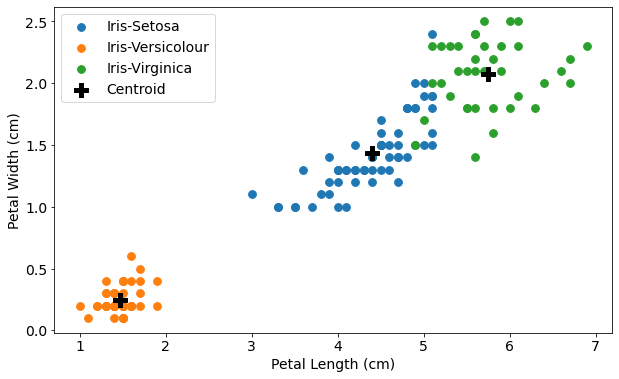

In [11]:
fig, ax = plt.subplots(nrows=1, figsize=(10, 6))

clusters = np.unique(predictions)

for cluster, label in zip(clusters, species):
    plt.scatter(X_values[predictions == cluster, 2], 
                X_values[predictions == cluster, 3],
                label=label, s=60)

for i in range(3):
    ax.scatter(centroids[i, 2], centroids[i, 3], color="k", 
               marker="P", s=200, label="Centroids")

ax.legend([*species, "Centroid"])
ax.set_xlabel("Petal Length (cm)")
ax.set_ylabel("Petal Width (cm)");

### Saving the Model for Production

In [12]:
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)
!ls

 Iris.csv	   'Sol2. KMeans_Clustering.ipynb'
 kmeans_model.pkl  'Task 2 - Predictions using UnSupervised ML.ipynb'
